# PU-Net Point Cloud Upsampling


> by Lequan Yu, Xianzhi Li, Chi-Wing Fu, Daniel Cohen-Or, Pheng-Ann Heng




## 1. Introduction

### 1.1 Point clouds
* A point cloud is a discrete set of data points in space.
* The points may represent a 3D shape or object.
* Each point position has its set of Cartesian coordinates (X, Y, Z).
* Point clouds are generally produced by 3D scanners or by photogrammetry software, which measure many points on the external surfaces of objects around them.
  * Example:

    ![alt text](https://upload.wikimedia.org/wikipedia/commons/4/4c/Point_cloud_torus.gif)

### 1.2 Point Cloud Upsampling

* Point cloud upsampling is a crucial technique in the field of 3D data processing and computer vision, aimed at enhancing the resolution and fidelity of point cloud representations.
* In point cloud data, points are often irregularly distributed and may have varying densities, leading to challenges in accurately representing fine details or capturing smooth surfaces.
* Upsampling methods aim to address these limitations by increasing the density of points while preserving the underlying geometry and structure of the object or scene.
  * Example:
  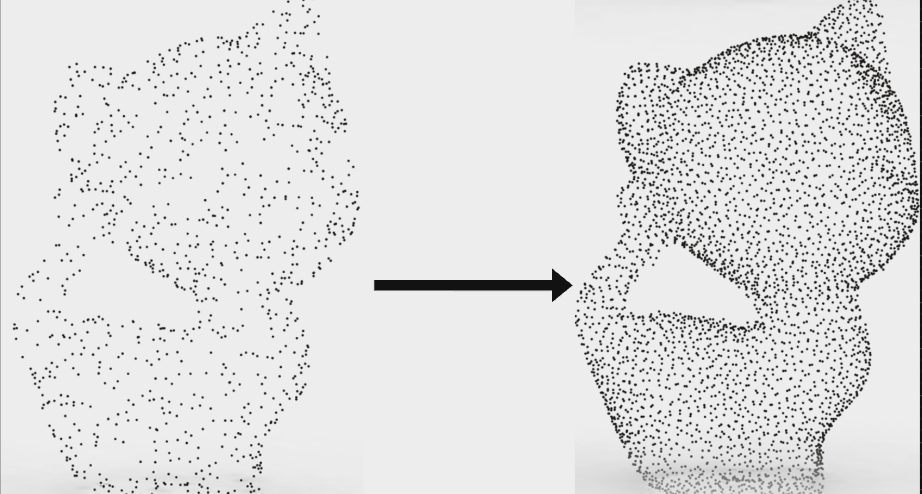

### 1.3 Related work before PU-Net

* Optimization methods by Alexa et al. and Lipman et al. use Voronoi diagram interpolation and locally optimal projection (LOP) for point cloud upsampling. Huang et al. enhanced these with weighted LOP to handle density issues, but they rely on surface smoothness assumptions. Huang et al. challenged this with an edge-aware resampling technique, needing precise normals and tuning. Conversely, Wu et al. proposed a deep points representation method integrating consolidation and completion, but it lacks robustness against significant noise due to the absence of global smoothness enforcement.
* Deep-learning-based methods: Recent endeavors in this field have predominantly focused on classification, segmentation, and high-level analysis of point clouds using architectures like PointNet++. However, there was a notable absence of prior works dedicated to point cloud upsampling, signaling an unexplored frontier in the field.

## 2. PU-Net

### 2.1 Architecture

<img alt="pu-net" src="https://www.researchgate.net/profile/Lequan-Yu/publication/322652760/figure/fig2/AS:667649025515547@1536191340920/The-architecture-of-PU-Net-better-view-in-color-version-The-input-has-N-points-while.png"/>

4 components:
  * Patch Extraction
  * Point Feature Embedding
  * Feature Expansion
  * Coordinate Reconstruction

## 3. Code

In [1]:
import numpy as np

In [2]:
np.__version__

'1.26.4'

## 4. Demo

In [22]:
import os
os.chdir('Pointnet2/pointnet2')
!sudo python3 setup.py install

FileNotFoundError: [Errno 2] No such file or directory: 'Pointnet2/pointnet2'

In [ ]:
!python3 setup.py install

In [7]:
from open3d import *
import pickle
import numpy as np
import torch

In [18]:
os.chdir('/home/zsolt/PycharmProjects/PU-NET/model')

In [19]:
!ls

auction_match	  cow_out.xyz  Pointnet2		  saved_models
build		  cow.xyz      pointnet2.egg-info	  streamlit
chamfer_distance  h5_data      PU_Net_Presentation.ipynb  train.py
cow10.xyz	  __init__.py  punet.py			  uploads
cow9.xyz	  main.py      __pycache__		  utils1


In [20]:
with open('saved_models/E4_0.pkl', 'rb') as f:
    x = pickle.load(f)

data = np.loadtxt(xml_file_path)[:, :3]

output = x(torch.tensor([data, data, data, data], dtype=torch.float32, device='cuda'))
output_list = output[0].cpu().detach().numpy().tolist()

temp_output_file = 'temp_output.xyz'
with open(temp_output_file, 'w') as f:
    for i in output_list:
        for j in i:
            f.write(str(j) + ' ')
        f.write('\n')

cloud = io.read_point_cloud(temp_output_file)
visualization.draw_geometries([cloud])

ModuleNotFoundError: No module named 'pointnet2_cuda'